# Book-Oracle: Basic Recommendation System

- Develop a basic Recommendation System
- 26.11.2023
- Janina, Oliwia, Neha, Nina

## Import Libraries

In [387]:
%run setup.ipy

## Cleaning

In [388]:
#not working
#from utils.data_cleaning import clean_users
#df = clean_users(df)

%run cleaning.ipynb



# correct spelling mistake in file

Ratings table has 1149780 rows and 3 columns
Books table has 271360 rows and 8 columns
Users table has 278858 rows and 3 columns
Columns and their data types:
book_title             object
book_author            object
year_of_publication    object
publisher              object
image_url_m            object
common_identifier       int64
dtype: object
Books table has 248238 rows and 6 columns
Columns and their data types:
user_id         int64
isbn           object
book_rating     int64
dtype: object

Number of duplicated rows:0

Number of rows with missing values:0
Ratings table has 1149780 rows and 4 columns

There are 118646 rows in ratings_df that do not have a common identifier in books_df
Columns and their data types:
user_id     int64
age         int64
city       object
country    object
dtype: object
Users table has 275565 rows and 4 columns
There are 0 missing values in df
There are 0 duplicates in df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005487 entries, 0 to 10054

## Import Data

In [389]:
df_kaggle = pd.read_csv('data/kaggle_full_df.csv')
df_kaggle.head(3)

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,2,0195153448,0,18,stockton,usa
1,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,269782,0801319536,7,30,edmonton,canada
2,Pay It Forward: A Novel,Catherine Ryan Hyde,2000,Simon &amp; Schuster,http://images.amazon.com/images/P/0684862719.0...,2392,269782,0684862719,8,30,edmonton,canada


In [390]:
# Import additional data to enrich df_kaggle with book descriptions
df_description = pd.read_csv('data/df_w_description.csv')

In [391]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   book_title           527 non-null    object
 1   book_author          527 non-null    object
 2   year_of_publication  527 non-null    int64 
 3   publisher            527 non-null    object
 4   image_url_m          527 non-null    object
 5   common_identifier    527 non-null    int64 
 6   user_id              527 non-null    int64 
 7   isbn                 527 non-null    object
 8   book_rating          527 non-null    int64 
 9   age                  527 non-null    int64 
 10  city                 527 non-null    object
 11  country              527 non-null    object
 12  rating_count         527 non-null    int64 
 13  description          527 non-null    object
dtypes: int64(6), object(8)
memory usage: 57.8+ KB


In [392]:
#Merge tables df_w_description with df_kaggle to create one dataframe
df = pd.merge(df_kaggle, df_description[['common_identifier', 'description']], on='common_identifier', how='left')

# Save the merged DataFrame
df.to_csv('incl_description.csv', index=False)

In [393]:
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country,description
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,2,0195153448,0,18,stockton,usa,NaN
1,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,269782,0801319536,7,30,edmonton,canada,NaN
2,Pay It Forward: A Novel,Catherine Ryan Hyde,2000,Simon &amp; Schuster,http://images.amazon.com/images/P/0684862719.0...,2392,269782,0684862719,8,30,edmonton,canada,NaN
3,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,3172,269782,0140039589,10,30,edmonton,canada,"One of the most beloved novels of our time, Ri..."
4,On Writing,Stephen King,2000,Scribner,http://images.amazon.com/images/P/0684853523.0...,7188,269782,0671024256,0,30,edmonton,canada,Stephen King reflects on how his writing has h...


## Cleaning New Table

In [394]:
#Final check for missing values
missing_country_rows = df['country'].isnull()

# Filter the DataFrame to show only rows where 'country' is empty
missing_country_data = df[missing_country_rows]


In [395]:
df['description'].fillna('Generic Description', inplace=True)

In [396]:
#remove rows with missing country values
# Drop rows with NaN values in the 'country' column
df = df.dropna(subset=['country'])

In [397]:
column_name = 'year_of_publication'
value_to_find = 'Gallimard'

# Filter the DataFrame based on the condition
filtered_data = df[df[column_name] == value_to_find]

# Display the resulting DataFrame
filtered_data

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country,description
348208,"Peuple Du Ciel, Suivi De 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,220730,137190,2070426769,0,31,rennes,france,Generic Description


In [398]:
non_numeric_rows = df[pd.to_numeric(df['year_of_publication'], errors='coerce').isna()]
non_numeric_rows

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country,description
348208,"Peuple Du Ciel, Suivi De 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,220730,137190,2070426769,0,31,rennes,france,Generic Description
396519,"Dk Readers: Creating The X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,209537,227771,078946697X,7,19,savion,israel,Generic Description
496939,"Dk Readers: Creating The X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,221677,130571,0789466953,0,0,summerville,usa,Generic Description
498938,"Dk Readers: Creating The X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,209537,169663,078946697X,0,0,towson,usa,Generic Description


In [399]:
# Drop rows where the value is not a number
df.drop(df[df['year_of_publication'] == 'Gallimard'].index, inplace=True)
df.drop(df[df['year_of_publication'] == 'DK Publishing Inc'].index, inplace=True)


In [400]:
#Remove age column as only 50% of ages are available and therefore cannot be used as feature
df = df.drop('age', axis=1) 

In [401]:
#Check if age is removed
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,country,description
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,2,0195153448,0,stockton,usa,Generic Description
1,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,269782,0801319536,7,edmonton,canada,Generic Description
2,Pay It Forward: A Novel,Catherine Ryan Hyde,2000,Simon &amp; Schuster,http://images.amazon.com/images/P/0684862719.0...,2392,269782,0684862719,8,edmonton,canada,Generic Description
3,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,3172,269782,0140039589,10,edmonton,canada,"One of the most beloved novels of our time, Ri..."
4,On Writing,Stephen King,2000,Scribner,http://images.amazon.com/images/P/0684853523.0...,7188,269782,0671024256,0,edmonton,canada,Stephen King reflects on how his writing has h...


In [402]:
#change data type
#data['city'] = df['city'].astype('str') #change location
df['isbn'] = df['isbn'].astype('str') #change year of publication to integer
df['common_identifier'] = df['common_identifier'].astype('int')
df['user_id'] = df['user_id'].astype('int')
df['year_of_publication'] = df['year_of_publication'].astype('int')
df['book_title'] = df['book_title'].astype('str')
df['description'] = df['description'].astype('str')
df['book_author'] = df['book_author'].astype('str')
df['publisher'] = df['publisher'].astype('str')
df['image_url_m'] = df['image_url_m'].astype('str')
df['city'] = df['city'].astype('str')
df['country'] = df['country'].astype('str')

## Data Subset

In [403]:
#from utils.modeling import create_data_subset
#df_new = create_data_subset(df)

In [404]:
#Only Rating above 0
df = df[df['book_rating']>0]

In [405]:
#Only users from US or Canada
df = df[df['country'].str.contains("usa|canada")]

In [406]:
df.shape

(303032, 12)

In [407]:
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,country,description
1,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,269782,0801319536,7,edmonton,canada,Generic Description
2,Pay It Forward: A Novel,Catherine Ryan Hyde,2000,Simon &amp; Schuster,http://images.amazon.com/images/P/0684862719.0...,2392,269782,0684862719,8,edmonton,canada,Generic Description
3,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,3172,269782,0140039589,10,edmonton,canada,"One of the most beloved novels of our time, Ri..."
5,Writing The Circle: Native Women Of Western Ca...,Jeanne Perreault,1990,Lpg Distribution,http://images.amazon.com/images/P/0920897886.0...,95231,269782,0920897886,10,edmonton,canada,Generic Description
6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,2,8,0002005018,5,timmins,canada,Generic Description


### Create new variable Value Count

In [408]:
#Add a new column with a total rating count for each book by common identifier
df['rating_count'] = df.groupby(['book_title', 'book_author'])['book_rating'].transform('count')

#Show a list of books that got the highest rating count, group by title and author to show unique books

df.groupby(['book_title', 'book_author', 'rating_count']).size().reset_index(name='Count').sort_values(by='rating_count', ascending=False).head(5)

,book_title,book_author,rating_count,Count
86042,The Lovely Bones: A Novel,Alice Sebold,614,614
79268,The Da Vinci Code,Dan Brown,420,420
91346,The Secret Life Of Bees,Sue Monk Kidd,387,387
103977,Wild Animus,Rich Shapero,352,352
90242,The Red Tent (Bestselling Backlist),Anita Diamant,351,351


### Define Popularity Threshold

In [409]:
popularity_threshold = 50
df = df[df['rating_count'] >= popularity_threshold]
df.shape

(51972, 13)

### Define User Activity Threshold

In [410]:
#Subset only users with more than 30 ratings

user_rating_counts = df['user_id'].value_counts()
df = df[df['user_id'].isin(user_rating_counts[user_rating_counts >= 30].index)]
df.shape

(4430, 13)

In [411]:
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,country,description,rating_count
2671,The Kitchen God'S Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,6,110912,080410753X,9,milpitas,usa,An absorbing narrative of Winnie Louie's life.,99
2673,Pigs In Heaven,Barbara Kingsolver,1993,Harpercollins,http://images.amazon.com/images/P/0060168013.0...,40,110912,0060922532,8,milpitas,usa,Generic description,96
2679,The Five People You Meet In Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,108,110912,0786868716,10,milpitas,usa,Eddie dies on his eighty-third birthday in a t...,231
2681,Angels &Amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,119,110912,0671027360,9,milpitas,usa,A novel about a symbologist who discovers the ...,274
2683,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial,http://images.amazon.com/images/P/0060976845.0...,135,110912,0060976845,8,milpitas,usa,"Don't miss Little Altars Everywhere, the New Y...",170


### Create Bestseller Column

In [412]:
#Lower case description so that it is case insensitiv
df['description'] = df['description'].str.lower()

In [413]:
# Create bestseller colum from description
df['bestseller'] = df['description'].str.contains('bestseller', case=False).map({True: '1', False: '0'})


In [414]:
#Change Data type of bestseller column to string
df['bestseller'] = df['bestseller'].astype('str')

In [415]:
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,country,description,rating_count,bestseller
2671,The Kitchen God'S Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,6,110912,080410753X,9,milpitas,usa,an absorbing narrative of winnie louie's life.,99,0
2673,Pigs In Heaven,Barbara Kingsolver,1993,Harpercollins,http://images.amazon.com/images/P/0060168013.0...,40,110912,0060922532,8,milpitas,usa,generic description,96,0
2679,The Five People You Meet In Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,108,110912,0786868716,10,milpitas,usa,eddie dies on his eighty-third birthday in a t...,231,0
2681,Angels &Amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,119,110912,0671027360,9,milpitas,usa,a novel about a symbologist who discovers the ...,274,0
2683,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial,http://images.amazon.com/images/P/0060976845.0...,135,110912,0060976845,8,milpitas,usa,"don't miss little altars everywhere, the new y...",170,0


## Creating Genre

In [416]:
# Create a new column 'genre' and initialize it as None
df['genre'] = 'Other'

# Define keywords for different genres
genres_keywords = {
    'Crime': ["Detective", "Mystery", "Investigation", "Thriller", "Suspense", "Murder", "Criminal", "Police", "Noir", "Forensic", "Whodunit", "Legal", "Serial Killer", "Crime Scene", "Alibi", "Interrogation", "Plot Twist", "Evidence", "Cold Case", "Underworld", "Detective Agency", "Clues", "Criminal Mastermind", "Conspiracy", "Femme Fatale", "Red Herring", "Kidnapping", "Espionage", "Heist", "Organized Crime", "Gangster", "Vigilante", "Blackmail", "Corruption", "Double Cross", "Spy", "Betrayal", "Smuggling", "Ransom", "Stakeout", "Pursuit", "Surveillance", "Intrigue", "Unsolved", "Covert Operation", "Deception", "Psychopath", "Criminal Profiler", "Conspiracy Theory", "Criminal Underworld", "Hitman", "Rogue Agent", "Secret Service", "Police Procedural", "Cover-Up", "Ex-Convict", "Crime Boss", "Crime Syndicate", "Dark Alley", "Secret Mission", "Drug Cartel", "Hostage", "Undercover", "White Collar Crime", "Detective Fiction", "Robbery", "Interpol", "Manhunt", "Puzzling", "Criminal Psychologist", "Mafia", "Assassination", "Cybercrime", "Underworld Connections", "Missing Person", "Witness Protection", "Smokescreen", "Vigilante Justice", "False Identity", "Crime Lord", "Unsolved Mystery", "Infiltration", "Crime Wave", "Noir Atmosphere", "Coercion", "Crime Thriller", "Organized Crime Family", "Streetwise", "Criminal Network", "Criminal Investigation", "Criminal Ties", "Crime Drama", "Criminal Profiling", "Gang Warfare", "Crime Solving", 'detective', 'crime','killer','killing', 'killings', 'criminal', 'prision','murder','murder','murders','threatens','track', 'kidnap','scared', 'escape', 'police', 'security', 'fbi', 'corpse', 'dead body', 'court','thriller', 'betrayal', 'millitary', 'NYPD', 'detective', 'homicide', 'courtroom', 'legal'],
    'Romance': ['romance', 'love', 'loved','relationship', 'loving','wedding', 'cheating','marriage', 'marrying', 'kiss','forever', 'hear', 'heartwarming', 'lover','couple','passion', 'passionate' ],
    'Comedy': ['funny', 'comedy', 'humor', 'hilarious','fun', 'joking', 'laughing', 'laughter'],
    'Science Fiction': ['science fiction', 'sci-fi', 'futuristic', 'future'],
    'Drama': ['tragic', 'drama', 'accident', 'tragedy', 'dramedy', 'injured', 'injury'],
    'Fantasy': [ 'fantasy', 'witch', 'coven','hero','dragon', 'fairy', 'saga', 'vampire', 'fairytale', 'fairy tale', 'magic', 'sorcery'],
    'Historical': ['king', 'queen', 'world war'],
    'Mystery':['strange', 'uncanny', 'mystery'],
    'Spiritual':['spiritual', 'meditation','meditating'],
    'Biography':['biography', 'life', 'biographical','memoirs', 'memoir'],
    'Christmas':['christmas', 'xmas','santa'],
}

# Function to assign genre based on keywords
def assign_genre(summary):
    for genre, keywords in genres_keywords.items():
        if any(keyword in summary.lower() for keyword in keywords):
            return genre
    return 'Other'

# Apply the function to create the 'genre' column
df['genre'] = df['description'].apply(assign_genre)

# Display the DataFrame with the new 'genre' column
df.tail(2)

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,country,description,rating_count,bestseller,genre
710009,I Know This Much Is True (Oprah'S Book Club),Wally Lamb,1998,Regan Books,http://images.amazon.com/images/P/0060391626.0...,10616,69389,0060391626,8,nebraska city,usa,generic description,71,0,Other
710013,Nicolae: The Rise Of Antichrist (Left Behind N...,Tim F. Lahaye,1998,Tyndale House Publishers,http://images.amazon.com/images/P/0842329242.0...,13679,69389,0842329242,8,nebraska city,usa,continues the story of the tribulation force a...,54,0,Other


In [417]:
#change datatype of genre to string
df['genre'] = df['genre'].astype('str')

In [418]:
# Show 'genre' column, where value is not 'Other'
filtered_genre = df[df['genre'] != 'Other']#['genre']

# Display specific columns for rows where 'genre' is not 'None'
print(filtered_genre[['genre', 'book_title', 'book_author', 'description', 'bestseller']])

            genre                                         book_title  \
2671    Biography                             The Kitchen God'S Wife   
2679        Drama                 The Five People You Meet In Heaven   
2686      Romance                              Bridget Jones'S Diary   
2693        Crime       Vinegar Hill (Oprah'S Book Club (Paperback))   
2695        Crime                      Digital Fortress : A Thriller   
...           ...                                                ...   
709989    Romance  Hard Eight : A Stephanie Plum Novel (A Stephan...   
709990  Biography                                      Skeleton Crew   
709992      Crime                  Seven Up (A Stephanie Plum Novel)   
709993      Crime  B Is For Burglar (Kinsey Millhone Mysteries (P...   
709995    Romance                                        Rose Madder   

             book_author                                        description  \
2671             Amy Tan     an absorbing narrative of w

## Pre-processing Data

In [419]:

# Encode categorical features
label_encoder = LabelEncoder()
df['book_title_encoded'] = label_encoder.fit_transform(df['book_title'])
df['description_encoded'] = label_encoder.fit_transform(df['description'])
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
df['bestseller_encoded'] = label_encoder.fit_transform(df['bestseller'])
df['book_author_encoded'] = label_encoder.fit_transform(df['book_author'])
df['publisher_encoded'] = label_encoder.fit_transform(df['publisher'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['country_encoded'] = label_encoder.fit_transform(df['country'])
df['isbn_encoded'] = label_encoder.fit_transform(df['isbn'])
df['image_url_m_encoded'] = label_encoder.fit_transform(df['image_url_m'])
df['year_of_publication_encoded'] = label_encoder.fit_transform(df['year_of_publication'])

In [420]:

# Normalize numerical features
scaler = StandardScaler()
df[['book_rating_encoded', 'rating_count_encoded']] = scaler.fit_transform(df[['book_rating', 'rating_count']])

In [421]:
df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,...,bestseller_encoded,book_author_encoded,publisher_encoded,city_encoded,country_encoded,isbn_encoded,image_url_m_encoded,year_of_publication_encoded,book_rating_encoded,rating_count_encoded
2671,The Kitchen God'S Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,6,110912,080410753X,9,milpitas,...,0,10,81,51,1,873,208,17,0.57,-0.29
2673,Pigs In Heaven,Barbara Kingsolver,1993,Harpercollins,http://images.amazon.com/images/P/0060168013.0...,40,110912,0060922532,8,milpitas,...,0,30,43,51,1,16,1,19,-0.01,-0.32
2679,The Five People You Meet In Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,108,110912,0786868716,10,milpitas,...,0,176,48,51,1,864,490,29,1.15,1.32
2681,Angels &Amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,119,110912,0671027360,9,milpitas,...,0,51,79,51,1,735,435,27,0.57,1.85
2683,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial,http://images.amazon.com/images/P/0060976845.0...,135,110912,0060976845,8,milpitas,...,0,200,70,51,1,27,22,22,-0.01,0.58


## Train Test Split

In [422]:

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


## Modelling: Neuronal Network

In [423]:
# Define the neural network architecture by using embeddings as they are recommended for categorical features in reco engines
embedding_layer_title = layers.Embedding(input_dim=len(df['book_title_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_description = layers.Embedding(input_dim=len(df['description_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_bestseller = layers.Embedding(input_dim=len(df['bestseller_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_genre = layers.Embedding(input_dim=len(df['genre_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_author = layers.Embedding(input_dim=len(df['book_author_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_publisher = layers.Embedding(input_dim=len(df['publisher_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_city = layers.Embedding(input_dim=len(df['city_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_country = layers.Embedding(input_dim=len(df['country_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_year = layers.Embedding(input_dim=len(df['year_of_publication_encoded'].unique()), output_dim=8, input_length=1)

#flatten dimensions
flatten_layer = layers.Flatten()
concatenated_layer = layers.Concatenate()
dense_1 = layers.Dense(64, activation='relu')
dense_2 = layers.Dense(32, activation='relu')
dense_output = layers.Dense(1, activation='linear')  # Output layer for regression

#Input layer
input_layer_title = layers.Input(shape=(1,))
input_layer_description = layers.Input(shape=(1,))
input_layer_bestseller = layers.Input(shape=(1,))
input_layer_genre = layers.Input(shape=(1,))
input_layer_author = layers.Input(shape=(1,))
input_layer_publisher = layers.Input(shape=(1,))
input_layer_city = layers.Input(shape=(1,))
input_layer_country = layers.Input(shape=(1,))
input_layer_year = layers.Input(shape=(1,))
input_layer_rating_count = layers.Input(shape=(1,))

Standard Recommendation Systems: Traditional recommendation systems often rely on collaborative filtering or content-based filtering. Collaborative filtering looks at user-item interactions and tries to find similarities between users or items. Content-based filtering considers the characteristics of items and users to make recommendations.

Neural Network-Based Recommendation Systems: These systems use neural networks to learn distributed representations (embeddings) of users and items. The embeddings capture complex relationships and patterns in the data, allowing the model to understand user preferences and item characteristics more effectively.

In [424]:
#Connect the layers for 'book_title'
embedded_output_title = embedding_layer_title(input_layer_title)
flattened_output_title = flatten_layer(embedded_output_title)

#Connect the layers for 'description'
embedded_output_description = embedding_layer_description(input_layer_description)
flattened_output_description = flatten_layer(embedded_output_description)

#Connect the layers for 'bestseller'
embedded_output_bestseller = embedding_layer_description(input_layer_bestseller)
flattened_output_bestseller = flatten_layer(embedded_output_bestseller)

#Connect the layers for 'genre'
embedded_output_genre = embedding_layer_description(input_layer_genre)
flattened_output_genre = flatten_layer(embedded_output_genre)

# Connect the layers for 'book_author'
embedded_output_author = embedding_layer_author(input_layer_author)
flattened_output_author = flatten_layer(embedded_output_author)

# Connect the layers for 'publisher'
embedded_output_publisher = embedding_layer_publisher(input_layer_publisher)
flattened_output_publisher = flatten_layer(embedded_output_publisher)

# Connect the layers for 'city'
embedded_output_city = embedding_layer_city(input_layer_city)
flattened_output_city = flatten_layer(embedded_output_city)

# Connect the layers for 'country'
embedded_output_country = embedding_layer_country(input_layer_country)
flattened_output_country = flatten_layer(embedded_output_country)

# Connect the layers for 'year_of_publication'
embedded_output_year = embedding_layer_year(input_layer_year)
flattened_output_year = flatten_layer(embedded_output_year)

In [425]:

# Include the 'rating_count' directly
flattened_output_rating_count = input_layer_rating_count

In [426]:
# Concatenate the flattened outputs (multiple)
concatenated_output = concatenated_layer([flattened_output_title, 
                                          flattened_output_description, 
                                          flattened_output_bestseller,
                                          flattened_output_genre, 
                                          flattened_output_author, 
                                          flattened_output_publisher,
                                          flattened_output_city, 
                                          flattened_output_country, 
                                          flattened_output_year, 
                                          flattened_output_rating_count]) 

In [427]:
# layers
dense_1_output = dense_1(concatenated_output)
dense_2_output = dense_2(dense_1_output)
output_layer = dense_output(dense_2_output)

model = keras.Model(inputs=[input_layer_title, 
                            input_layer_description, 
                            input_layer_bestseller, 
                            input_layer_genre, 
                            input_layer_author, 
                            input_layer_publisher, 
                            input_layer_city, 
                            input_layer_country, 
                            input_layer_year, 
                            input_layer_rating_count], 
                            outputs=output_layer) 


In [428]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Train Model

In [429]:
# Prepare the data for training
#X_train = train_data['year_of_publication'].values
X_train = [train_data['year_of_publication_encoded'].values, 
           train_data['book_title_encoded'].values, 
           train_data['description_encoded'].values, 
           train_data['bestseller_encoded'].values,
           train_data['genre_encoded'].values,
           train_data['publisher_encoded'].values, 
           train_data['book_author_encoded'].values, 
           train_data['city_encoded'].values, 
           train_data['country_encoded'].values, 
           train_data['rating_count_encoded'].values] 

y_train = train_data['book_rating_encoded']

Epoch 1/9


89/89 [==============================] - 5s 48ms/step - loss: 0.9903 - val_loss: 0.9022
Epoch 2/9
89/89 [==============================] - 2s 22ms/step - loss: 0.9606 - val_loss: 0.8859
Epoch 3/9
89/89 [==============================] - 2s 20ms/step - loss: 0.9113 - val_loss: 0.9010
Epoch 4/9
89/89 [==============================] - 2s 21ms/step - loss: 0.8687 - val_loss: 0.9318
Epoch 5/9
89/89 [==============================] - 2s 19ms/step - loss: 0.8516 - val_loss: 0.9331
Epoch 6/9
89/89 [==============================] - 2s 20ms/step - loss: 0.8358 - val_loss: 0.9722
Epoch 7/9
89/89 [==============================] - 2s 19ms/step - loss: 0.8252 - val_loss: 0.9714
Epoch 8/9
89/89 [==============================] - 2s 19ms/step - loss: 0.8147 - val_loss: 0.9975
Epoch 9/9
89/89 [==============================] - 2s 19ms/step - loss: 0.8160 - val_loss: 0.9493


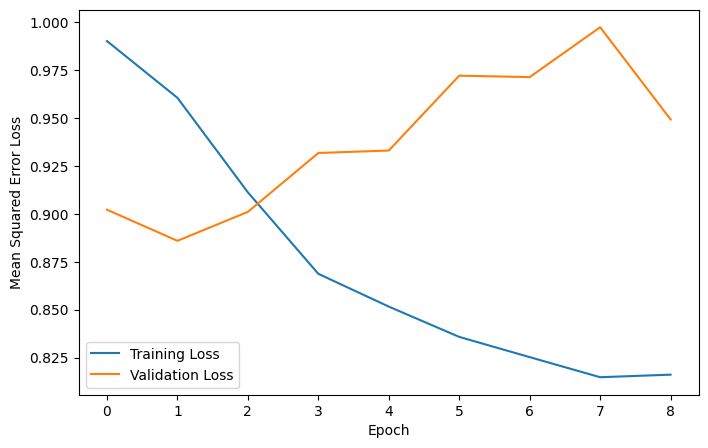

In [430]:
# Train the model and collect the training history and put it in a variable called history
history = model.fit(X_train, y_train, epochs=9, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


# Model Prediction

In [431]:
# Use the trained model for predictions
predictions = model.predict(X_train)

# Convert predictions to a DataFrame for easier manipulation
predictions_df = pd.DataFrame(predictions, columns=['predicted_rating_encoded'])


111/111 [==============================] - 1s 6ms/step


In [432]:
# check results of predictions of X_train
predictions

array([[ 0.09011029],
       [ 0.30519998],
       [ 0.6404917 ],
       ...,
       [-0.6018598 ],
       [-0.20543273],
       [ 0.19028576]], dtype=float32)

# Evaluation

In [433]:
# Evaluate the model on the test set
X_test = [
    test_data['book_title_encoded'].values,
    test_data['description_encoded'].values,
    test_data['bestseller_encoded'].values,
    test_data['genre_encoded'].values,
    test_data['book_author_encoded'].values,
    test_data['publisher_encoded'].values,
    test_data['city_encoded'].values,
    test_data['country_encoded'].values,
    test_data['year_of_publication_encoded'].values,
    test_data['rating_count_encoded'].values
]
y_test = test_data['book_rating_encoded']
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Use the trained model for predictions
predictions = model.predict(X_test)

28/28 [==============================] - 0s 10ms/step - loss: 1.1813
Mean Squared Error on Test Set: 1.1812931299209595
28/28 [==============================] - 0s 7ms/step


In [434]:
# check predictions of X_test
predictions

array([[-3.66560549e-01],
       [-1.19008124e-01],
       [-1.96516812e-01],
       [-2.02853262e-01],
       [-9.63814836e-03],
       [-3.16739321e-01],
       [ 4.81920034e-01],
       [-3.85523647e-01],
       [-3.20645213e-01],
       [-3.89399379e-01],
       [-6.85076118e-01],
       [-8.76049578e-01],
       [ 2.83853821e-02],
       [ 2.60856867e-01],
       [-1.15696071e-02],
       [-3.14212441e-01],
       [-3.34243149e-01],
       [-2.65910983e-01],
       [-5.87173939e-01],
       [-2.54921645e-01],
       [-2.51176775e-01],
       [ 3.52468252e-01],
       [-1.21905312e-01],
       [-1.23312131e-01],
       [-1.55063316e-01],
       [-7.65854895e-01],
       [-1.43953368e-01],
       [ 1.75120048e-02],
       [ 1.85409896e-02],
       [-4.24810231e-01],
       [ 1.43827870e-01],
       [-2.42972508e-01],
       [-5.75612247e-01],
       [-9.40419585e-02],
       [-7.34028399e-01],
       [-6.49021626e-01],
       [-1.07970826e-01],
       [-8.63830447e-01],
       [-6.9

# Book Prediction

In [435]:
# Find the index of the highest predicted rating
index_of_highest_rating = predictions.argmax()

# Retrieve 'book_title' and 'book_author' values corresponding to the highest rating
highest_rated_book_title = test_data['book_title'].iloc[index_of_highest_rating]
highest_rated_book_author = test_data['book_author'].iloc[index_of_highest_rating]
highest_rated_book_publication = test_data['year_of_publication'].iloc[index_of_highest_rating]
highest_rated_book_rating = test_data['book_rating'].iloc[index_of_highest_rating]


# Display the result
print(f"You may like the book {highest_rated_book_title} from {highest_rated_book_author} published in {highest_rated_book_publication} with a book rating of {highest_rated_book_rating} ")

You may like the book Tuesdays With Morrie: An Old Man, A Young Man, And Life'S Greatest Lesson from Mitch Albom published in 1997 with a book rating of 10 


# Error Analysis

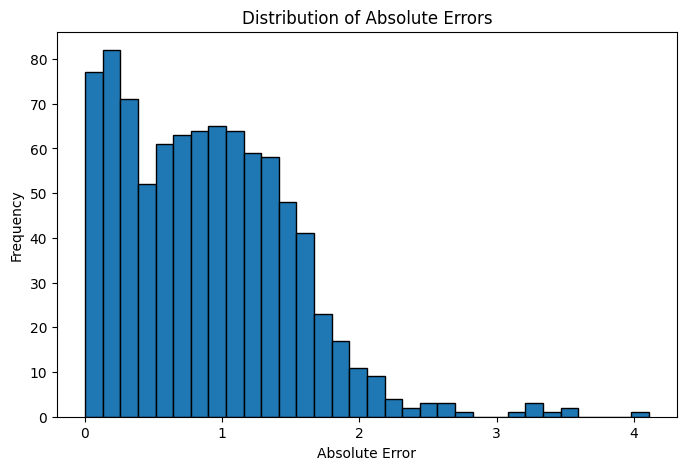

Predicted Rating: -0.57, Actual Rating: -0.01
Book Title: The Testament
Book Author: John Grisham
---
Predicted Rating: 0.30, Actual Rating: 0.57
Book Title: The Secret Garden
Book Author: Frances Hodgson Burnett
---
Predicted Rating: 0.34, Actual Rating: -1.75
Book Title: What Looks Like Crazy On An Ordinary Day
Book Author: Pearl Cleage
---
Predicted Rating: 0.29, Actual Rating: -0.01
Book Title: Wicked: The Life And Times Of The Wicked Witch Of The West
Book Author: Gregory Maguire
---
Predicted Rating: -0.58, Actual Rating: -0.59
Book Title: The Tommyknockers
Book Author: Stephen King
---
Predicted Rating: -0.69, Actual Rating: -1.17
Book Title: Couplehood
Book Author: Paul Reiser
---
Predicted Rating: -0.47, Actual Rating: -0.59
Book Title: Beloved
Book Author: Toni Morrison
---
Predicted Rating: -1.26, Actual Rating: 0.57
Book Title: The Hitchhiker'S Guide To The Galaxy
Book Author: Douglas Adams
---
Predicted Rating: -0.52, Actual Rating: 0.57
Book Title: Bleachers
Book Author: 

In [436]:
# Calculate the absolute errors by taking the absolute difference between the predicted values (predictions.flatten()) 
#and the actual values (y_test.values). 
errors = np.abs(predictions.flatten() - y_test.values)

# Plot a histogram of the errors to visualize the distribution of absolute errors
plt.hist(errors, bins=32, edgecolor='black')
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

# Display some examples of predictions and actual ratings
examples_to_display = 10
random_indices = np.random.choice(len(errors), examples_to_display, replace=False)

for idx in random_indices:
    print(f"Predicted Rating: {predictions[idx][0]:.2f}, Actual Rating: {y_test.values[idx]:.2f}")
    print(f"Book Title: {test_data['book_title'].values[idx]}")
    print(f"Book Author: {test_data['book_author'].values[idx]}")
    print(f"---")

# User-specific Book Prediction

## Identify User

In [324]:
#find user that is above popularity and activity threshold
threshold_user = df[df['user_id'].isin(user_rating_counts[user_rating_counts >= 30].index)]
threshold_user.head(3)

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,...,bestseller_encoded,book_author_encoded,publisher_encoded,city_encoded,country_encoded,isbn_encoded,image_url_m_encoded,year_of_publication_encoded,book_rating_encoded,rating_count_encoded
2671,The Kitchen God'S Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,6,110912,080410753X,9,milpitas,...,0,10,81,51,1,873,208,17,0.57,-0.29
2673,Pigs In Heaven,Barbara Kingsolver,1993,Harpercollins,http://images.amazon.com/images/P/0060168013.0...,40,110912,0060922532,8,milpitas,...,0,30,43,51,1,16,1,19,-0.01,-0.32
2679,The Five People You Meet In Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,108,110912,0786868716,10,milpitas,...,0,176,48,51,1,864,490,29,1.15,1.32


## Get User ID from Streamlit App

In [239]:
# !pip install streamlit
# Get user Id from app
#user_id_from_app = input("choose your book")

## Prediction User-Specific 

In [363]:
# Step 1: Prepare input data for user_id == 110912
user_id_data = df[df['user_id'] == 6251]
X_user = [
    user_id_data['book_title_encoded'].values,
    user_id_data['description_encoded'].values,
    user_id_data['bestseller_encoded'].values,
    user_id_data['genre_encoded'].values,
    user_id_data['book_author_encoded'].values,
    user_id_data['publisher_encoded'].values,
    user_id_data['city_encoded'].values,
    user_id_data['country_encoded'].values,
    user_id_data['year_of_publication_encoded'].values,
    user_id_data['rating_count_encoded'].values
]

In [364]:
user_id_data.head(3)

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,...,bestseller_encoded,book_author_encoded,publisher_encoded,city_encoded,country_encoded,isbn_encoded,image_url_m_encoded,year_of_publication_encoded,book_rating_encoded,rating_count_encoded
5640,The Tao Of Pooh,Benjamin Hoff,1983,Penguin Books,http://images.amazon.com/images/P/0140067477.0...,74,6251,0140067477,10,wahiawa,...,1,31,67,81,1,48,37,9,1.15,-0.21
5666,The Secret Life Of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,357,6251,0670894605,8,wahiawa,...,1,229,67,81,1,720,47,29,-0.01,3.22
5669,Hannibal,Thomas Harris,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440224675.0...,411,6251,0440224675,6,wahiawa,...,1,236,24,81,1,420,264,26,-1.17,0.20


In [365]:
# Step 2: Use the trained model to predict ratings for each book for the user
predicted_ratings_user = []
for index, row in user_id_data.iterrows():
    X_user_single_book = [
        np.array([row['book_title_encoded']]),
        np.array([row['description_encoded']]),
        np.array([row['bestseller_encoded']]),
        np.array([row['genre_encoded']]),
        np.array([row['book_author_encoded']]),
        np.array([row['publisher_encoded']]),
        np.array([row['city_encoded']]),
        np.array([row['country_encoded']]),
        np.array([row['year_of_publication_encoded']]),
        np.array([row['rating_count_encoded']])
    ]

    y_test = user_id_data['book_rating_encoded']


    predictions = model.predict(X_user_single_book)
    predicted_ratings_user.append(predictions[0][0])

1/1 [==============================] - 0s 18ms/step


## Evaluation of User-specific Prediction

In [366]:
# Convert the list to a numpy array
actual_ratings_user = user_id_data['book_rating_encoded'].values
predicted_ratings_user = np.array(predicted_ratings_user)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_ratings_user, predicted_ratings_user)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_ratings_user, predicted_ratings_user)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 1.5255035467386813
Mean Absolute Error (MAE): 1.0147964947512884


## Top 5 Book Recommendations for a Specific User

In [374]:

# Step 3: Add predicted ratings to user_id_110912_data
user_id_data['book_rating_encoded'] = predicted_ratings_user

# Step 4: Filter out books the user has already rated
user_rated_books = user_id_data['book_title_encoded'].values
unrated_books_mask = ~df['book_title_encoded'].isin(user_rated_books)
unrated_books_data = df[unrated_books_mask]

# Step 5: Create a new DataFrame with book information and predicted ratings
recommended_books = unrated_books_data[['book_title', 'book_author', 'genre', 'year_of_publication', 'book_rating']]


# Step 6: Sort the DataFrame by predicted rating in descending order
#sorted_books = recommended_books.sort_values(by='book_rating', ascending=False)

# Step 7: Recommend the top two books
top_five_recommendations = recommended_books.head(5).sort_values(by='book_rating', ascending=False)


### Print Top 5 Book Recommendation

In [375]:

# Step 8: Print the recommendations with the required information
print("Top 5 Book Recommendations especially for you:")
for index, row in top_five_recommendations.iterrows():
    print(f"Book Title: {row['book_title']}")
    print(f"Book Author: {row['book_author']}")
    print(f"Genre: {row['genre']}")
    print(f"Year of Publication: {row['year_of_publication']}")
    print(f"Book Rating: {row['book_rating']}")
    print("------------------------")

Top 5 Book Recommendations especially for you:
Book Title: The Five People You Meet In Heaven
Book Author: Mitch Albom
Genre: Drama
Year of Publication: 2003
Book Rating: 10
------------------------
Book Title: The Kitchen God'S Wife
Book Author: Amy Tan
Genre: Biography
Year of Publication: 1991
Book Rating: 9
------------------------
Book Title: Angels &Amp; Demons
Book Author: Dan Brown
Genre: Other
Year of Publication: 2001
Book Rating: 9
------------------------
Book Title: Pigs In Heaven
Book Author: Barbara Kingsolver
Genre: Other
Year of Publication: 1993
Book Rating: 8
------------------------
Book Title: Little Altars Everywhere: A Novel
Book Author: Rebecca Wells
Genre: Other
Year of Publication: 1996
Book Rating: 8
------------------------


## Testing of Prediction

In [288]:
# check the actual book_ration
recommended_books.head(5)

,book_title,book_author,genre,year_of_publication,book_rating
5640,The Tao Of Pooh,Benjamin Hoff,Romance,1983,10
5666,The Secret Life Of Bees,Sue Monk Kidd,Other,2003,8
5669,Hannibal,Thomas Harris,Crime,2000,6
5685,Angela'S Ashes: A Memoir,Frank Mccourt,Other,1999,8
5687,One For The Money (Stephanie Plum Novels (Pape...,Janet Evanovich,Other,1995,7


In [291]:
# check if user has not read the books
check_results_df = df[(df['user_id'] == 110912) & ((df['book_author'] == 'The Secret Life Of Bees'))]
check_results_df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,...,bestseller_encoded,book_author_encoded,publisher_encoded,city_encoded,country_encoded,isbn_encoded,image_url_m_encoded,year_of_publication_encoded,book_rating_encoded,rating_count_encoded


In [ ]:
sorted_books.head(5)

,book_title,book_author,genre,year_of_publication,book_rating
5640,The Tao Of Pooh,Benjamin Hoff,Romance,1983,10
197780,The Little Prince,Antoine De Saint-Exupã©Ry,Fantasy,1968,10
197778,The Firm,John Grisham,Other,1991,10
197772,Life Of Pi,Yann Martel,Other,2002,10
197770,Chicken Soup For The Soul (Chicken Soup For Th...,Jack Canfield,Other,1993,10


# Oldversion

In [ ]:
# Using flatten()
one_user_predictions_flat = one_user_predictions.flatten()

# Make predictions for one user 
#index_of_highest_rating_user = one_user_predictions_flat.argmax()

# Find the index of the highest predicted rating for unread books
index_of_highest_rating_unread = one_user_predictions_flat.argmax()

### model independent ###
# Retrieve 'book_title' and 'book_author' values corresponding to the highest rating
recommended_book_title_unread = unread_books['book_title'].values[index_of_highest_rating_unread]
recommended_book_genre_unread = unread_books['genre'].values[index_of_highest_rating_unread]
recommended_book_author_unread = unread_books['book_author'].values[index_of_highest_rating_unread]
recommended_book_publication_unread = unread_books['year_of_publication'].values[index_of_highest_rating_unread]
#------------------------------
# Identify index with highest ranking
#index_of_highest_rating_user < len(one_user_data)

# Retrieve 'book_title' and 'book_author' values corresponding to the highest rating
#recommended_book_title_user = one_user_data['book_title'].values[index_of_highest_rating_user]
#recommended_book_genre_user = one_user_data['genre'].values[index_of_highest_rating_user]
#recommended_book_author_user = one_user_data['book_author'].values[index_of_highest_rating_user]
#recommended_book_publication_user = one_user_data['year_of_publication'].values[index_of_highest_rating_user]


### Recommend One Perfect Book to the User

In [ ]:
# Display the recommendation for one user 
print(f"You may like the book '{recommended_book_title_unread}' from author {recommended_book_author_unread} in the {recommended_book_genre_unread} genre published in {recommended_book_publication_unread}")
#---------------------------------
# Display the recommendation for one user 
#print(f"You may like the book '{recommended_book_title_user}' from author {recommended_book_author_user} in the {recommended_book_genre_user} genre published in {recommended_book_publication_user}")


You may like the book 'The Red Tent (Bestselling Backlist)' from author Anita Diamant in the Romance genre published in 1998


### Recommend 5 Books to the User Ordered by Highest Ratings without Showing Duplicates

In [ ]:
# Get indices of top 5 recommended books based on predicted ratings
top_5_indices_of_top_books = one_user_predictions_flat.argsort()[-5:][::-1]

# Retrieve top 5 book information
#top_5_books_one_user = one_user_data.iloc[top_5_indices_of_top_books]

# Retrieve information for the top 5 recommended books
top_5_books_one_user = unread_books.iloc[top_5_indices_of_top_books]

# Display the top 5 recommendations for one user
print("Our top 5 book recommendations for you:")
displayed_titles = set()  # keep track of displayed titles to remove duplicates

for i, book_info in enumerate(top_5_books_one_user.itertuples(), 1):
    if book_info.book_title not in displayed_titles: # remove duplicates
        
        # Print only if the book title is not already displayed
        print(f"{i}. '{book_info.book_title}' from Author {book_info.book_author} in the {book_info.genre} genre, published in {book_info.year_of_publication}")
        displayed_titles.add(book_info.book_title)

Our top 5 book recommendations for you:
1. 'The Red Tent (Bestselling Backlist)' from Author Anita Diamant in the Romance genre, published in 1998
2. 'Stupid White Men ...And Other Sorry Excuses For The State Of The Nation!' from Author Michael Moore in the Romance genre, published in 2002
3. 'American Gods' from Author Neil Gaiman in the Comedy genre, published in 2002
4. 'Red Dragon' from Author Thomas Harris in the Other genre, published in 2000
5. 'Lamb : The Gospel According To Biff, Christ'S Childhood Pal' from Author Christopher Moore in the Crime genre, published in 2003


In [ ]:
check_results_df = df[(df['user_id'] == 110912) & ((df['book_author'] == 'Julia Glass'))]
check_results_df.head()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,city,...,bestseller_encoded,book_author_encoded,publisher_encoded,city_encoded,country_encoded,isbn_encoded,image_url_m_encoded,year_of_publication_encoded,book_rating_encoded,rating_count_encoded


### Old Version that Contains Duplicates: Recommend 5 Books to the User Ordered by Highest Ratings

In [ ]:

# Get indices of top 5 recommended books based on predicted ratings
top_5_indices_one_user = one_user_predictions_flat.argsort()[-5:][::-1]

# Retrieve top 5 book information
top_5_books_one_user = one_user_data.iloc[top_5_indices_one_user]

# Display the top 5 recommendations for one user >> This is the final version
print("Our top 5 book recommendations for you:")
#for i, book_info in enumerate(top_5_books_one_user.itertuples(), 1):
#    print(f"{i}. '{book_info.book_title}' from Author: {book_info.book_author} in the {book_info.genre} genre, published in {book_info.year_of_publication}")

#This is a text version to see how the code perfroms
for i, (index, book_info) in enumerate(zip(top_5_indices_one_user, top_5_books_one_user.itertuples()), 1):
    print(f"{i}. Index: {index}, '{book_info.book_title}' from Author: {book_info.book_author} in the {book_info.genre} genre, published in {book_info.year_of_publication}")

Our top 5 book recommendations for you:
1. Index: 42, 'Tears Of The Giraffe (No.1 Ladies Detective Agency)' from Author: Alexander Mccall Smith in the Crime genre, published in 2002
2. Index: 17, 'The No. 1 Ladies' Detective Agency (Today Show Book Club #8)' from Author: Alexander Mccall Smith in the Crime genre, published in 2003
3. Index: 7, 'Digital Fortress : A Thriller' from Author: Dan Brown in the Crime genre, published in 2003
4. Index: 8, 'Digital Fortress : A Thriller' from Author: Dan Brown in the Crime genre, published in 2003
5. Index: 9, 'Divine Secrets Of The Ya-Ya Sisterhood : A Novel' from Author: Rebecca Wells in the Crime genre, published in 1996
